In [1]:
import pylab
import h5py
import math
import array
from numpy import *
import numpy as np
from pycbc.types import TimeSeries, FrequencySeries
from pycbc.waveform import get_td_waveform, get_fd_waveform
from pycbc.waveform.waveform_modes import get_td_waveform_modes
from pycbc import types, fft, waveform
import lal
from scipy import interpolate
from scipy.interpolate import interp1d
from lal import MSUN_SI, MTSUN_SI, G_SI, PC_SI, C_SI, PI
from pycbc.filter import match
from pycbc.psd import aLIGOZeroDetHighPower
from tqdm import tqdm#

import pandas as pd
import matplotlib as mpl

 
from matplotlib import gridspec
from matplotlib import ticker

import matplotlib.pyplot as plt


In [2]:
Numfit_data = np.loadtxt('/home/pratul/Downloads/Project/Analytical fits/New results/Best_dataset.txt') 

Hyb_ID = Numfit_data[:,1]
q_Vec = Numfit_data[:,2]
eta_Vec = Numfit_data[:,3]
tshift_Vec = Numfit_data[:,4]
tmatch_amp_Vec = Numfit_data[:,5]
tmatch_freq_Vec = Numfit_data[:,6]
l0_Vec = Numfit_data[:,7]
e0_Vec = Numfit_data[:,8]
f0_Vec = Numfit_data[:,9]
Match_Numfit = [99.78, 97.54, 99.28, 98.98, 98.01, 97.68, 98.93, 97.24, 98.78, 97.81, 97.58, 97.82, 98.69]
Match_Anlyfit = [99.78, 97.54, 99.28, 98.98, 98.01, 97.68, 98.93, 97.24, 98.78, 97.81, 97.58, 97.82, 98.68]

df = pd.DataFrame({
    "Hybrid": list((Hyb_ID)),
    "q": list(q_Vec),
    "eta": list(eta_Vec),
    "tshift": list(tshift_Vec),
    "tmatch_amp": list(tmatch_amp_Vec),
    "tmatch_freq": list(tmatch_freq_Vec),
    "l0": list(l0_Vec),
    "e0": list(e0_Vec),
    "f0": list(f0_Vec),
    "Match_Num": Match_Numfit,
    "Match_Anly": Match_Anlyfit
})

df.style 

,Hybrid,q,eta,tshift,tmatch_amp,tmatch_freq,l0,e0,f0,Match_Num,Match_Anly
0,1355.000000,1.000000,0.250000,-60.000000,-61.131040,-1270.259460,1.423000,0.173000,16.530000,99.780000,99.780000
1,1356.000000,1.000000,0.250000,35.000000,-30.279200,-3369.344140,1.574000,0.230000,15.630000,97.540000,97.540000
2,1358.000000,1.000000,0.250000,-50.000000,-50.872680,-545.853330,-2.682000,0.322000,13.510000,99.280000,99.280000
3,1359.000000,1.000000,0.250000,-75.000000,-75.914410,-931.065740,1.834000,0.317000,13.920000,98.980000,98.980000
4,1360.000000,1.000000,0.250000,85.000000,-50.203760,-2168.937350,-0.395000,0.416000,12.180000,98.010000,98.010000
5,1361.000000,1.000000,0.250000,90.000000,-55.092810,-2012.105460,-1.019000,0.416000,11.950000,97.680000,97.680000
6,1364.000000,2.000000,0.222220,0.000000,-30.131180,-4376.080050,-0.181000,0.172000,16.680000,98.930000,98.930000
7,1365.000000,2.000000,0.222220,85.000000,-125.073870,-3448.129660,-1.127000,0.209000,15.720000,97.240000,97.240000
8,1366.000000,2.000000,0.222220,45.000000,-30.344940,-2467.676300,-2.890000,0.320000,13.760000,98.780000,98.780000
9,1367.000000,2.000000,0.222220,-60.000000,-61.233330,-1583.977650,1.687000,0.320000,13.840000,97.810000,97.810000


In [3]:
# "Hinder+ modified all 20 simulations SEOBNRv4 model, full frequency range --Feb 16
g=open('/home/pratul/Downloads/Project/Analytical fits/New results/New_tshift_H+modified_20hyb_Feb16.txt',"r") 
lines=g.readlines() 
A=[] 
for x in lines: 
    A.append(float(x.split()[1])) 
g.close()

def tshift_Hinsp(q,e,l): 
    return A[0] + A[1]*q + A[2]*q**2 + A[3]*e + A[4]*e**2 + A[5]*e*q + A[6]*(e**2)*q + A[7]*(e)*math.cos(l + A[8]) + A[9]*(e**1)*(q**1)*math.cos(e*l + A[10]) + A[11]*(e**2)*math.cos(l + A[12])

g=open('/home/pratul/Downloads/Project/Analytical fits/New results/New_tamp_H+modified_20hyb_Feb16.txt',"r") 
lines=g.readlines() 
B=[] 
for x in lines: 
    B.append(float(x.split()[1])) 
g.close()

def tamp_Hinsp(eta,e,l): 
    return B[0] + B[1]*eta + B[2]*eta**2 + B[3]*e + B[4]*e**2 + B[5]*e*eta + B[6]*(e**2)*eta + B[7]*e*math.cos(l + B[8]) + B[9]*(e**1)*(eta**1)*math.cos(l + B[10]) + B[11]*(e**2)*math.cos(e*l + B[12])

g=open('/home/pratul/Downloads/Project/Analytical fits/New results/New_tfreq_H+modified_20hyb_Feb16.txt',"r") 
#g=open('/home/pratul/Downloads/freqpoints_new.txt',"r") 
lines=g.readlines() 
C=[] 
for x in lines: 
    C.append(float(x.split()[1])) 
g.close()

def tfreq_Hinsp(eta,e,l): 
    return C[0] + C[1]*eta + C[2]*eta**2 + C[3]*e + C[4]*e**2 + C[5]*e*eta + C[6]*(e**2)*eta + C[7]*e*eta*math.cos(l + C[8]) + C[9]*(e)*math.cos(l + C[10]) + C[11]*(e**2)*math.cos(e*l + C[12])

In [4]:
tshift_Anly_fit = []
for i in range(len(q_Vec)):
    tshift_Anly_fit.append(tshift_Hinsp(q_Vec[i],e0_Vec[i],l0_Vec[i]))

In [5]:
print(tshift_Anly_fit)

[-60.00108188360612, 34.99903400969106, -49.99577252802351, -75.0001773928982, 85.00315269488647, 90.00557949274275, 0.00021758676498961904, 85.00220914546327, 45.005582939856026, -59.998447769557, 35.00173999082082, -34.9942061714101, 105.00285429029526]


In [6]:
tamp_Anly_fit = []
for i in range(len(q_Vec)):
    tamp_Anly_fit.append(tamp_Hinsp(eta_Vec[i],e0_Vec[i],l0_Vec[i]))

In [7]:
print(tamp_Anly_fit)

[-61.0459114655917, -30.18008077450793, -50.66312408547492, -75.79796982597173, -49.9393754282014, -54.7963703773579, -30.020673759440655, -124.92424098278573, -30.152779070447423, -61.13023733594673, -29.692416018740232, -35.8277938168697, -29.8650874097616]


In [8]:
tfreq_Anly_fit = []
for i in range(len(q_Vec)):
    tfreq_Anly_fit.append(tfreq_Hinsp(eta_Vec[i],e0_Vec[i],l0_Vec[i]))

In [9]:
print(tfreq_Anly_fit)

[-1266.9645870797322, -3368.057091558134, -548.9576395629701, -934.9130809081544, -2180.044985002023, -2022.9357011878456, -4372.321842741039, -3445.3269778417816, -2469.321438275758, -1586.7540312341735, -2902.65271458964, -2207.7725897358905, -2654.267440931406]


[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


/tmp/ipykernel_5758/283238418.py:38: RuntimeWarning: divide by zero encountered in divide
  ax1.scatter(ID, abs((tshift_Anly_fit-tshift_Vec)/tshift_Vec), marker='+',s=90, color='black')


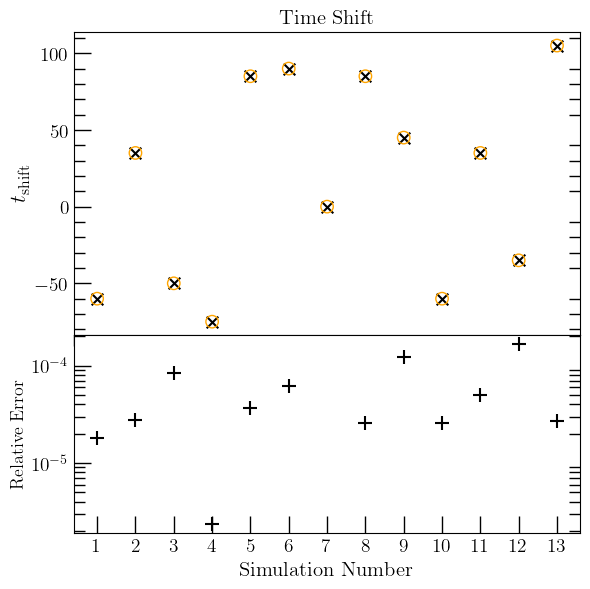

In [13]:
ID = np.arange(1,14,1)
print(ID)
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True, "text.usetex": True})
plt.figure(figsize=(6,6))
gs = gridspec.GridSpec(2,1,height_ratios=[1,0.65])
gs.update(hspace=0.0)
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex=ax0)

# plt.suptitle('Time Shift',fontsize=15)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
mpl.rcParams['xtick.major.size'] = 12
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.size'] = 8
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 12
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.size'] = 8
mpl.rcParams['ytick.minor.width'] = 1
plt.locator_params(axis='y',nbins=6)
ax0.tick_params(axis='y',direction='in')
# ax0.tick_params(axis='x',direction='in')
ax0.minorticks_on()
ax0.tick_params(axis='y',which='minor',direction='in',right=True)
# ax0.tick_params(axis='x',which='minor',bottom=False)

ax0.scatter(ID, tshift_Anly_fit, marker="x", color = 'black',s=70, label='Analytical')
ax0.scatter(ID, tshift_Vec, marker = 'o', facecolor ='none',edgecolor='orange',s=80, label='Numerical' )

ax1.tick_params(axis='y',direction='in')
ax1.tick_params(axis='x',direction='in')
ax1.minorticks_on()
ax1.tick_params(axis='y',which='minor',direction='in',right=True)
ax1.tick_params(axis='x',which='minor',bottom=False)
# ax1.set_yticks([0.000,0.025, 0.050])
ax1.scatter(ID, abs((tshift_Anly_fit-tshift_Vec)/tshift_Vec), marker='+',s=90, color='black')
plt.xticks(ID)
plt.xlabel(r'$\rm{Simulation\ Number}$',fontsize=15)
ax0.set_ylabel(r'$t_{\rm shift}$',fontsize=16)
ax1.set_ylabel(r'$\rm{Relative\ Error}$',fontsize=13)
ax0.set_title(r'$\rm{Time\ Shift}$',fontsize=15)
ax1.set_yscale('log')
#plt.legend()
plt.tight_layout()
plt.savefig('/home/pratul/Downloads/Project/Plots_draft/Anly_fit_tshift.pdf',dpi=300)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


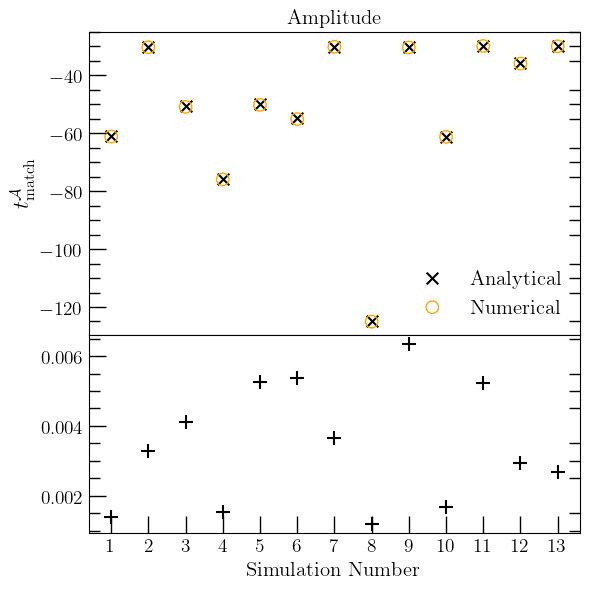

In [15]:
ID = np.arange(1,14,1)
print(ID)
plt.figure(figsize=(6,6))
gs = gridspec.GridSpec(2,1,height_ratios=[1,0.65])
gs.update(hspace=0.0)
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex=ax0)

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
mpl.rcParams['xtick.major.size'] = 12
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.size'] = 8
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 12
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.size'] = 8
mpl.rcParams['ytick.minor.width'] = 1
plt.locator_params(axis='y',nbins=6)
ax0.tick_params(axis='y',direction='in')
# plt.tick_params(axis='x',direction='in')
ax0.minorticks_on()
ax0.tick_params(axis='y',which='minor',direction='in',right=True)
ax0.tick_params(axis='x',which='minor',bottom=False)         
ax0.scatter(ID, tamp_Anly_fit, marker="x", color = 'black',s=70, label=r'\rm{Analytical}')
ax0.scatter(ID, tmatch_amp_Vec, marker = 'o', facecolor ='none',edgecolor='orange',s=80, label=r'\rm{Numerical}' )
ax1.tick_params(axis='y',direction='in')
plt.tick_params(axis='x',direction='in')
ax1.minorticks_on()
ax1.tick_params(axis='y',which='minor',direction='in',right=True)
ax1.tick_params(axis='x',which='minor',bottom=False)         
ax1.scatter(ID, abs((tamp_Anly_fit-tmatch_amp_Vec)/tmatch_amp_Vec), marker="+", color = 'black',s=90)

plt.xticks(ID)

plt.xlabel(r'$\rm{Simulation\ Number}$',fontsize=15)
ax0.set_ylabel(r'$t_{\rm match}^\mathcal{A}$',fontsize=16)
ax0.set_title(r'$\rm{Amplitude}$',fontsize=15)
ax0.legend(loc='lower right',fontsize=15,frameon=False)
# ax1.set_ylabel(r'$\rm{Error}$',fontsize=13)
# ax1.set_yscale('log')
# ax1.set_xlim(xmax=1e-2)
ax1.set_yticks([0.002,0.004,0.006])
plt.tight_layout()
plt.savefig('/home/pratul/Downloads/Project/Plots_draft/Anly_fit_amp.pdf',dpi=300)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


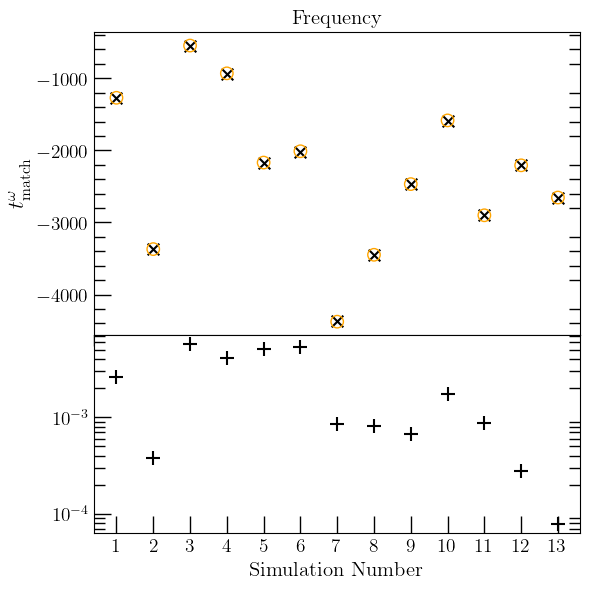

In [16]:
ID = np.arange(1,14,1)
print(ID)
plt.figure(figsize=(6,6))
gs = gridspec.GridSpec(2,1,height_ratios=[1,0.65])
gs.update(hspace=0.0)
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex=ax0)

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
mpl.rcParams['xtick.major.size'] = 12
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.size'] = 8
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 12
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.size'] = 8
mpl.rcParams['ytick.minor.width'] = 1
plt.locator_params(axis='y',nbins=6)
ax0.tick_params(axis='y',direction='in')
# ax0.tick_params(axis='x',direction='in')
ax0.minorticks_on()
ax0.tick_params(axis='y',which='minor',direction='in',right=True)
# ax0.tick_params(axis='x',which='minor',bottom=False)        
ax0.scatter(ID, tfreq_Anly_fit, marker="x", color = 'black',s=70,label=r'\rm{Analytical}')
ax0.scatter(ID, tmatch_freq_Vec, marker = 'o', facecolor ='none',edgecolor='orange',s=80,label=r'\rm{Numerical}' )
# ax0.set_xlim([-5000,500])

ax1.tick_params(axis='y',direction='in')
ax1.tick_params(axis='x',direction='in')
ax1.minorticks_on()
ax1.tick_params(axis='y',which='minor',direction='in',right=True)
ax1.tick_params(axis='x',which='minor',bottom=False)        
ax1.scatter(ID, abs((tfreq_Anly_fit-tmatch_freq_Vec)/tmatch_freq_Vec), marker="+", color = 'black',s=90,label=r'\rm{Analytical}')
ax1.set_yscale('log')
plt.xticks(ID)
plt.xlabel(r'$\rm{Simulation\ Number}$',fontsize=15)
ax0.set_ylabel(r'$t_{\rm match}^\omega$',fontsize=16)
ax0.set_title(r'$\rm{Frequency}$',fontsize=15)
# ax1.set_ylabel(r'$\rm{Error}$',fontsize=13)

# ax1.set_yticks([0, 1e-9, 2e-9])
plt.tight_layout()
#plt.legend()
plt.savefig('/home/pratul/Downloads/Project/Plots_draft/Anly_fit_freq.pdf',dpi=300)